In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

Since we were provided with 2 datasets, with train and test datasets, so we are importing both the datasets together in 1 cell

In [3]:
#Train Dataset
data = pd.read_csv("fraudTrain.csv") 
#Test Dataset
data_t = pd.read_csv("fraudTest.csv") 

In [4]:
data_t.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
# checking dimensions of our data

data.shape

(1296675, 23)

In [7]:
# checking columns

data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
# checking details of columns

data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

##EDA

### Checking NULL values

In [10]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
# No null values found so don't need to operate on it.

### Working on columns now

In [12]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
# we cannot work on trans_num as there is no unique pattern, so dropping it
data = data.drop("trans_num",1)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [15]:
# checking cc_num columns

data.cc_num.value_counts()

571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
340187018810220           7
4975457191020             7
3545578418030657          7
4734310647841293          7
4714017207228610634       7
Name: cc_num, Length: 983, dtype: int64

In [16]:
# checking first and last name columns
data['first'].value_counts()

Christopher    26669
Robert         21667
Jessica        20581
James          20039
Michael        20009
               ...  
Cameron            9
Phyllis            8
Molly              8
Angelica           7
Samantha           7
Name: first, Length: 352, dtype: int64

In [17]:
data["last"].value_counts()

Smith        28794
Williams     23605
Davis        21910
Johnson      20034
Rodriguez    17394
             ...  
Peterson         9
Contreras        9
Strong           8
Schaefer         7
Blake            7
Name: last, Length: 481, dtype: int64

In [18]:
# we can see the first and last names of customers are not unique while the cc_num is, so we will use cc_num to distinct between customers
# and since first and last are now of no use of ours so we will drop them

data = data.drop(columns=["first","last"])

In [19]:
# checking data now
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   gender                 1296675 non-null  object 
 7   street                 1296675 non-null  object 
 8   city                   1296675 non-null  object 
 9   state                  1296675 non-null  object 
 10  zip                    1296675 non-null  int64  
 11  lat                    1296675 non-null  float64
 12  long                   1296675 non-null  float64
 13  city_pop               1296675 non-null  int64  
 14  job               

In [20]:
# we can have look on unix time, unix time is generally the number of seconds passed from the UNIX EPOCH i.e. 00:00:00 UTC on 1 January 1970
# we can use this to know the recency of transactions of same cc_num

In [21]:
data["recency"] = data.groupby(by="cc_num")["unix_time"].diff()

In [22]:
# checking null values of recency
data["recency"].isnull().sum()

983

In [23]:
# we are getting null values because as 983 because there are 983 unique values of cards, this means whenever the cc_num group changes
# python makes the first value of every group null, so making them as starting payment, we will initialize null values to -1

data.loc[data.recency.isnull(),["recency"]] = -1

In [24]:
#checking null values again
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
recency                  0
dtype: int64

In [25]:
# checking columns structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   gender                 1296675 non-null  object 
 7   street                 1296675 non-null  object 
 8   city                   1296675 non-null  object 
 9   state                  1296675 non-null  object 
 10  zip                    1296675 non-null  int64  
 11  lat                    1296675 non-null  float64
 12  long                   1296675 non-null  float64
 13  city_pop               1296675 non-null  int64  
 14  job               

In [26]:
# converting trans_date_trans_time to datetime

data["trans_date_trans_time"] = pd.to_datetime(data["trans_date_trans_time"])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   gender                 1296675 non-null  object        
 7   street                 1296675 non-null  object        
 8   city                   1296675 non-null  object        
 9   state                  1296675 non-null  object        
 10  zip                    1296675 non-null  int64         
 11  lat                    1296675 non-null  float64       
 12  long                   12966

In [28]:
#checking data
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,...,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,recency
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,-1.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,-1.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,-1.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0,-1.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,-1.0


In [29]:
# we now don't need unix_time so we can drop it
data= data.drop("unix_time",1)

In [30]:
# checking data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   gender                 1296675 non-null  object        
 7   street                 1296675 non-null  object        
 8   city                   1296675 non-null  object        
 9   state                  1296675 non-null  object        
 10  zip                    1296675 non-null  int64         
 11  lat                    1296675 non-null  float64       
 12  long                   12966

In [31]:
# we even don't need Unnamed: 0 as it is the index only and we have index present with us
data = data.drop(columns=["Unnamed: 0"])

In [32]:
# checking data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   zip                    1296675 non-null  int64         
 10  lat                    1296675 non-null  float64       
 11  long                   1296675 non-null  float64       
 12  city_pop               12966

In [33]:
# checking do column
data.dob.value_counts()

1977-03-23    5636
1981-08-29    4636
1988-09-15    4623
1955-05-06    3661
1995-07-12    3123
              ... 
1960-10-28       7
1970-06-25       7
1962-03-14       7
1936-05-04       7
1999-10-26       7
Name: dob, Length: 968, dtype: int64

In [34]:
# in predicting customer frauds, dob doesn't play any role that whether there will be a fraud with customer or not, so removing dob column too
data = data.drop("dob",1)

# checking columns now

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   zip                    1296675 non-null  int64         
 10  lat                    1296675 non-null  float64       
 11  long                   1296675 non-null  float64       
 12  city_pop               12966

In [35]:
# sometimes distance from the customer's home location to the merchant's location can prove out to be main reason for fraud, so taking the 
# difference of longitude and lattitude of respective columns

data["lat_diff"] = abs(data.lat - data.merch_lat)
data["long_diff"] = abs(data["long"] - data["merch_long"])

# we have used abs function so that we get proper distance diiference in positive as abs makes negative values positive and used as a mod function


In [36]:
# checking data
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,recency,lat_diff,long_diff
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,-1.0,0.067507,0.870215
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,-1.0,0.271247,0.024038
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,-1.0,0.969904,0.107519
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,-1.0,0.803731,0.447271
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,-1.0,0.254299,0.830441


In [37]:
# now since we have the difference, it is estimated that difference between each degree of longitude and lattitude is 69 miles(approx)
# or 110 kilometers (approx), so taking displacement into account as it will be difficult to calculate distance between merchant's location
# or customer's location so applying pythogoras theorem

data["displacement"] = np.sqrt(pow((data["lat_diff"]*110),2) + pow((data["long_diff"]*110),2))

# here we have applied pythogoras theorem and we have multiplied with 110 because each degree of longitude and lattitude is 69 miles(approx)
# or 110 kilometers apart

In [38]:
# checking data
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,long,city_pop,job,merch_lat,merch_long,is_fraud,recency,lat_diff,long_diff,displacement
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,...,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,-1.0,0.067507,0.870215,96.011245
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,...,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,-1.0,0.271247,0.024038,29.954105
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,...,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,-1.0,0.969904,0.107519,107.342986
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,...,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,-1.0,0.803731,0.447271,101.178169
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,...,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,-1.0,0.254299,0.830441,95.535506


In [39]:
# checking columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   zip                    1296675 non-null  int64         
 10  lat                    1296675 non-null  float64       
 11  long                   1296675 non-null  float64       
 12  city_pop               12966

In [40]:
# now since we got the displacement so longitudes and lattitudes columns are of no use now, so we can remove them
data = data.drop(columns = ["lat","long","merch_lat","merch_long","lat_diff","long_diff"])

In [41]:
# checking columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   zip                    1296675 non-null  int64         
 10  city_pop               1296675 non-null  int64         
 11  job                    1296675 non-null  object        
 12  is_fraud               12966

In [42]:
# since state contains both city and zip code and street comes under city, so we can move with state column and drop street, city and zip
# we can work with cities through their population parameter, as names of cities cannot implement whether a fraud will be done or not, while
# population of a city can.
data= data.drop(columns = ["city","zip","street"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   state                  1296675 non-null  object        
 7   city_pop               1296675 non-null  int64         
 8   job                    1296675 non-null  object        
 9   is_fraud               1296675 non-null  int64         
 10  recency                1296675 non-null  float64       
 11  displacement           1296675 non-null  float64       
dtypes: datetime64[ns](1), float6

In [43]:
# checking displacement column
data.displacement.describe()

count    1.296675e+06
mean     8.422272e+01
std      3.132233e+01
min      2.625292e-02
25%      6.214537e+01
50%      8.781422e+01
75%      1.075289e+02
max      1.554701e+02
Name: displacement, dtype: float64

In [44]:
# now we can bin the displacement into near, far and very far records
# if merchant lies between the range of 0-45 then it is near, while above 45 but below 90 will be far and rest can be very far

data.loc[(data["displacement"]<45),["location"]] = "Nearby"

In [45]:
data.loc[((data["displacement"]>45) & (data["displacement"]<90)),["location"]] = "Far Away"
data.loc[(data["displacement"]>90),["location"]] = "Long Distance"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   state                  1296675 non-null  object        
 7   city_pop               1296675 non-null  int64         
 8   job                    1296675 non-null  object        
 9   is_fraud               1296675 non-null  int64         
 10  recency                1296675 non-null  float64       
 11  displacement           1296675 non-null  float64       
 12  location               12966

In [46]:
# checking location column
data.location.value_counts(normalize = True)

Long Distance    0.474771
Far Away         0.394164
Nearby           0.131064
Name: location, dtype: float64

In [47]:
# Although date part in column trans_date_trans_time is not important because that is historical data, but time part of the component is important
# so creating a column of time

data["Time"] = pd.to_datetime(data["trans_date_trans_time"],"%H:%M").dt.time

In [48]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,city_pop,job,is_fraud,recency,displacement,location,Time
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,3495,"Psychologist, counselling",0,-1.0,96.011245,Long Distance,00:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,149,Special educational needs teacher,0,-1.0,29.954105,Nearby,00:00:44
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,4154,Nature conservation officer,0,-1.0,107.342986,Long Distance,00:00:51
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,1939,Patent attorney,0,-1.0,101.178169,Long Distance,00:01:16
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,99,Dance movement psychotherapist,0,-1.0,95.535506,Long Distance,00:03:06


In [49]:
# converting Time column to datetime
data["Time"] = pd.to_datetime(data["trans_date_trans_time"]).dt.hour

In [50]:
# segregating city_population tab on the basis of less dense, adequately densed, densely populated
data.loc[(data["city_pop"]<10000),["city_pop_segment"]] = "Less Dense"
data.loc[((data["city_pop"]>10000) & (data["city_pop"]<50000)),["city_pop_segment"]] = "Adequately Dense"
data.loc[(data["city_pop"]>50000),["city_pop_segment"]] = "Densely populated"

In [51]:
# checking constitution of each segment
data.city_pop_segment.value_counts(normalize = True)

Less Dense           0.699953
Densely populated    0.187151
Adequately Dense     0.112896
Name: city_pop_segment, dtype: float64

In [52]:
# dropping column city_pop as it is of no use now
data = data.drop("city_pop",1)

In [53]:
# dividing recency column into segments but first converting them from seconds to minutes
data.recency = data.recency.apply(lambda x: float((x/60)/60))

In [54]:
# dividing recency to segments based on number of hours passed
data.loc[(data["recency"]<1),["recency_segment"]] = "Recent_Transaction"
data.loc[((data["recency"]>1) & (data["recency"]<6)),["recency_segment"]] = "Within 6 hours"
data.loc[((data["recency"]>6) & (data["recency"]<12)),["recency_segment"]] = "After 6 hours"
data.loc[((data["recency"]>12) & (data["recency"]<24)),["recency_segment"]] = "After Half-Day"
data.loc[(data["recency"]>24),["recency_segment"]] = "After 24 hours"
data.loc[(data["recency"]<0),["recency_segment"]] = "First Transaction"
data.recency_segment.value_counts(normalize = True)

Within 6 hours        0.411834
After 6 hours         0.191659
Recent_Transaction    0.163714
After Half-Day        0.148911
After 24 hours        0.083124
First Transaction     0.000758
Name: recency_segment, dtype: float64

In [55]:
# examining category column
data.category.value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [56]:
# examining merchant column
data.merchant.value_counts()

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Treutel-King                       775
fraud_Douglas, DuBuque and McKenzie      775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64

In [57]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'job', 'is_fraud', 'recency', 'displacement',
       'location', 'Time', 'city_pop_segment', 'recency_segment'],
      dtype='object')

## Working on Test Data columns

In [58]:
# we cannot work on trans_num as there is no unique pattern, so dropping it
data_t = data_t.drop("trans_num",1)

In [59]:
# we can see the first and last names of customers are not unique while the cc_num is, so we will use cc_num to distinct between customers
# and since first and last are now of no use of ours so we will drop them

data_t = data_t.drop(columns=["first","last"])

In [60]:
data_t["recency"] = data_t.groupby(by="cc_num")["unix_time"].diff()

In [61]:
# we are getting null values because as 983 because there are 983 unique values of cards, this means whenever the cc_num group changes
# python makes the first value of every group null, so making them as starting payment, we will initialize null values to -1

data_t.loc[data_t.recency.isnull(),["recency"]] = -1

In [62]:
# converting trans_date_trans_time to datetime

data_t["trans_date_trans_time"] = pd.to_datetime(data_t["trans_date_trans_time"])

In [63]:
# we now don't need unix_time so we can drop it
data_t= data_t.drop("unix_time",1)

In [64]:
# we even don't need Unnamed: 0 as it is the index only and we have index present with us
data_t = data_t.drop(columns=["Unnamed: 0"])

In [65]:
# in predicting customer frauds, dob doesn't play any role that whether there will be a fraud with customer or not, so removing dob column too
data_t = data_t.drop("dob",1)

In [66]:
# sometimes distance from the customer's home location to the merchant's location can prove out to be main reason for fraud, so taking the 
# difference of longitude and lattitude of respective columns

data_t["lat_diff"] = abs(data_t.lat - data_t.merch_lat)
data_t["long_diff"] = abs(data_t["long"] - data_t["merch_long"])

# we have used abs function so that we get proper distance diiference in positive as abs makes negative values positive and used as a mod function


In [67]:
# now since we have the difference, it is estimated that difference between each degree of longitude and lattitude is 69 miles(approx)
# or 110 kilometers (approx), so taking displacement into account as it will be difficult to calculate distance between merchant's location
# or customer's location so applying pythogoras theorem

data_t["displacement"] = np.sqrt(pow((data_t["lat_diff"]*110),2) + pow((data_t["long_diff"]*110),2))

# here we have applied pythogoras theorem and we have multiplied with 110 because each degree of longitude and lattitude is 69 miles(approx)
# or 110 kilometers apart

In [68]:
# now since we got the displacement so longitudes and lattitudes columns are of no use now, so we can remove them
data_t = data_t.drop(columns = ["lat","long","merch_lat","merch_long","lat_diff","long_diff"])

In [69]:
# since state contains both city and zip code and street comes under city, so we can move with state column and drop street, city and zip
# we can work with cities through their population parameter, as names of cities cannot implement whether a fraud will be done or not, while
# population of a city can.
data_t= data_t.drop(columns = ["city","zip","street"])

In [70]:
# now we can bin the displacement into near, far and very far records
# if merchant lies between the range of 0-45 then it is near, while above 45 but below 90 will be far and rest can be very far

data_t.loc[(data_t["displacement"]<45),["location"]] = "Nearby"

In [71]:
data_t.loc[((data_t["displacement"]>45) & (data_t["displacement"]<90)),["location"]] = "Far Away"
data_t.loc[(data_t["displacement"]>90),["location"]] = "Long Distance"

In [72]:
# Although date part in column trans_date_trans_time is not important because that is historical data, but time part of the component is important
# so creating a column of time

data_t["Time"] = pd.to_datetime(data_t["trans_date_trans_time"],"%H:%M").dt.time

In [73]:
# converting Time column to datetime
data_t["Time"] = pd.to_datetime(data_t["trans_date_trans_time"]).dt.hour

In [74]:
# segregating city_population tab on the basis of less dense, adequately densed, densely populated
data_t.loc[(data_t["city_pop"]<10000),["city_pop_segment"]] = "Less Dense"
data_t.loc[((data_t["city_pop"]>10000) & (data_t["city_pop"]<50000)),["city_pop_segment"]] = "Adequately Dense"
data_t.loc[(data_t["city_pop"]>50000),["city_pop_segment"]] = "Densely populated"

In [75]:
# dropping column city_pop as it is of no use now
data_t = data_t.drop("city_pop",1)

In [76]:
# dividing recency column into segments but first converting them from seconds to minutes
data_t.recency = data_t.recency.apply(lambda x: float((x/60)/60))

In [77]:
# dividing recency to segments based on number of hours passed
data_t.loc[(data_t["recency"]<1),["recency_segment"]] = "Recent_Transaction"
data_t.loc[((data_t["recency"]>1) & (data_t["recency"]<6)),["recency_segment"]] = "Within 6 hours"
data_t.loc[((data_t["recency"]>6) & (data_t["recency"]<12)),["recency_segment"]] = "After 6 hours"
data_t.loc[((data_t["recency"]>12) & (data_t["recency"]<24)),["recency_segment"]] = "After Half-Day"
data_t.loc[(data_t["recency"]>24),["recency_segment"]] = "After 24 hours"
data_t.loc[(data_t["recency"]<0),["recency_segment"]] = "First Transaction"

In [78]:
data_t.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'job', 'is_fraud', 'recency', 'displacement',
       'location', 'Time', 'city_pop_segment', 'recency_segment'],
      dtype='object')

## Univariate Analysis

In [79]:
# checking the peak hours for transaction
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   state                  1296675 non-null  object        
 7   job                    1296675 non-null  object        
 8   is_fraud               1296675 non-null  int64         
 9   recency                1296675 non-null  float64       
 10  displacement           1296675 non-null  float64       
 11  location               1296675 non-null  object        
 12  Time                   12966

In [80]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,job,is_fraud,recency,displacement,location,Time,city_pop_segment,recency_segment
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,"Psychologist, counselling",0,-0.000278,96.011245,Long Distance,0,Less Dense,First Transaction
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,Special educational needs teacher,0,-0.000278,29.954105,Nearby,0,Less Dense,First Transaction
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,Nature conservation officer,0,-0.000278,107.342986,Long Distance,0,Less Dense,First Transaction
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,Patent attorney,0,-0.000278,101.178169,Long Distance,0,Less Dense,First Transaction
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,Dance movement psychotherapist,0,-0.000278,95.535506,Long Distance,0,Less Dense,First Transaction


In [81]:
# let's initialize a separate data containing fraud transactionsto analyze trends
data_fraud = data[data["is_fraud"]==1]

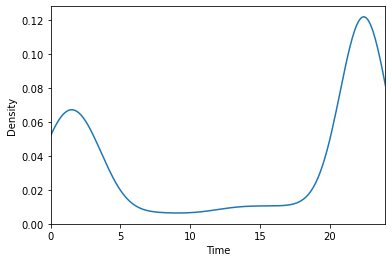

In [82]:
# checking fraud transactions peak hours

sns.kdeplot(data_fraud["Time"])
plt.xlim(left = 0,right = 24)
plt.show()

We can have a look that peak hours for fraud transactions starts from 07:00 P.M. to 5:00 A.M. which means transactions done in night needs to be scrutinised more and to be checked with the customer

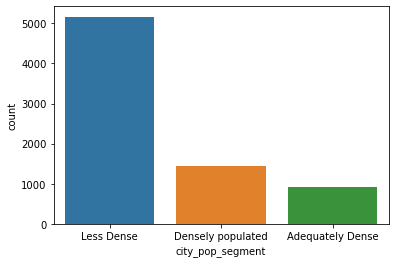

In [83]:
# lets have a look about the fraud transactions done in cities according to their populations
sns.countplot(data_fraud["city_pop_segment"])
plt.show()

Its seen that less dense cities are more prone to frauds as compared to more densed cities while on the other hand, adequately densed cities are less prone to frauds as compared to densely populated cities

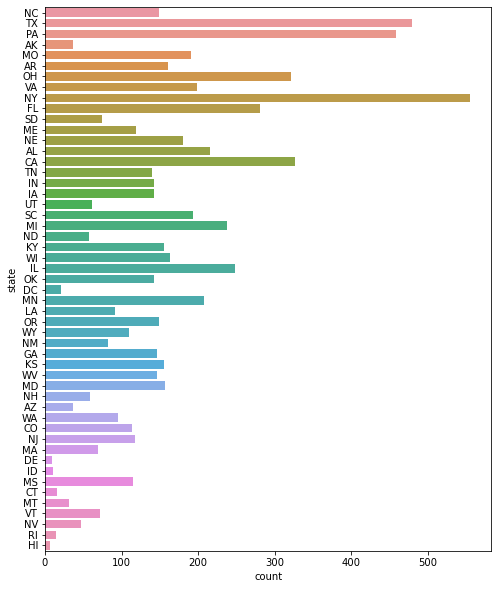

In [84]:
# let's have a look on state-wise fraud transactions
plt.figure(figsize = [8,10])
sns.countplot(y=data_fraud.state)
plt.show()

we can see the most number of frauds are done in New York, Texas and Pennsylvania respectively

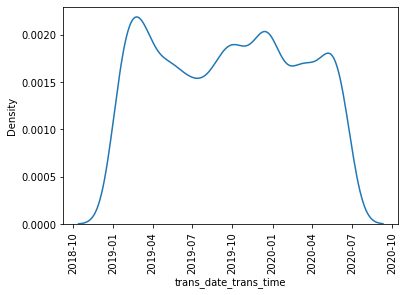

In [85]:
# let's analyze the the date when maximum frauds have happened
sns.kdeplot(data_fraud.trans_date_trans_time)
plt.xticks(rotation = 90)
plt.show()

The most number of frauds were done in 1st quarter of 2019

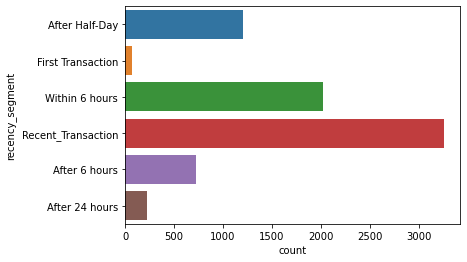

In [86]:
# checking fraud transactions based on recency
sns.countplot(y=data_fraud.recency_segment)
plt.show()

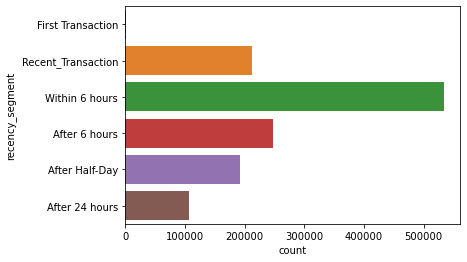

In [87]:
# let's check overall recent transactions
sns.countplot(y=data.recency_segment)
plt.show()

It can be observed that recent transactions are less in number overall while they are termed as more fraud, while other parameters like After Half-Day or Within 6 hours termed as fraud because probably customer have done a genuine transaction in the day, while the fraud transaction which was done through his/er card might be during the night time, as was seen earlier that peak hours for fraud transactions are in the night.

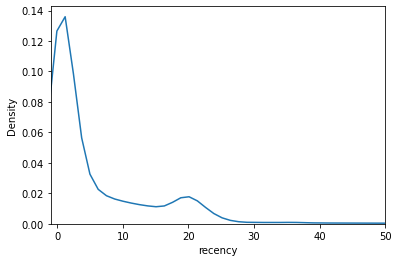

In [88]:
# checking how recent the transaction is can be termed as fraud
sns.kdeplot(data_fraud.recency)
plt.xlim(right = 50,left = -1)
plt.show()

So, it can be termed that transactions happened within 1 hour have high chances of being fraud

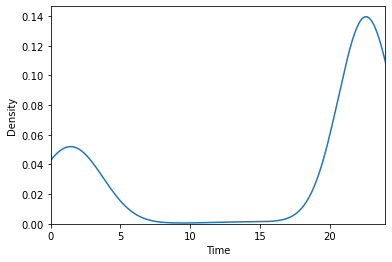

In [89]:
sns.kdeplot(data_fraud[data_fraud["recency_segment"] == "Recent_Transaction"].Time)
plt.xlim(left=0,right=24)
plt.show()

We can see that most of the transactions, which were done within one hour by the same card, were done in the peak hours, when fraud transactions were done

In [90]:
# checking separately for first transactions done through credit cards.
(data_fraud[data["recency_segment"] == "First Transaction"]["is_fraud"].sum()/len(data[data["recency"]<0]["is_fraud"]))*100

7.62970498474059

There are 7% transactions which were also termed as zero, since first transaction through a credit card by customer is very important as it builds the image of a company in customer's eyes, so it is highly important to check and ask for the customer's consent of his/er first transaction. This can also build the trust relationship of a company with the customer

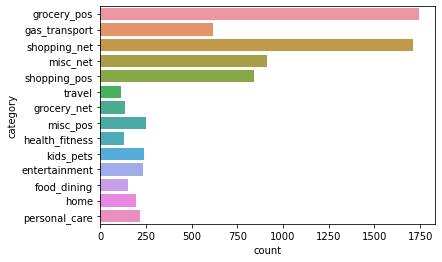

In [91]:
# checking which category have highest number of frauds
sns.countplot(y=data_fraud.category)
plt.show()

Offline Grocery and Internet Shopping having highest number of frauds made

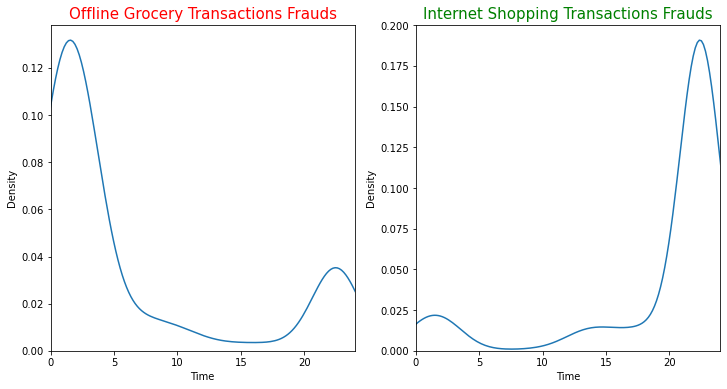

In [92]:
# checking fraud_peak hours in grocery_pos and shopping_net categories
plt.figure(figsize=[12,6])
plt.subplot(121)
sns.kdeplot(x=data_fraud[data_fraud.category == "grocery_pos"].Time)
plt.xlim(left=0,right=24)
plt.title(label = "Offline Grocery Transactions Frauds", fontdict = {"color": "Red", "size": 15, "weight" : "5"})
plt.subplot(122)
sns.kdeplot(x=data_fraud[data_fraud.category == "shopping_net"].Time)
plt.title(label = "Internet Shopping Transactions Frauds", fontdict = {"color": "Green", "size": 15, "weight" : "5"})
plt.xlim(left=0,right=24)
plt.show()

It can be seen in offline Grocery transactions that majority of transactions were done in night after 12:00 A.M. which is absurd, as there are very less customers (negligible) who approach to grocery stores to buy grocery same goes with Internet Shopping Transactions, as customers prefer to go to a sleep in these odd hours

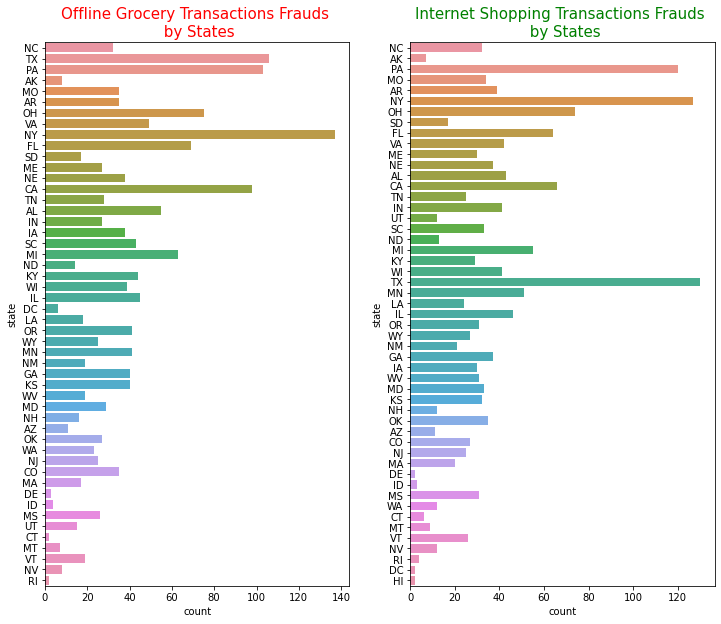

In [93]:
# let's check state-wise grocery and shopping frauds
plt.figure(figsize=[12,10])
plt.subplot(121)
sns.countplot(y=data_fraud[data_fraud.category == "grocery_pos"].state)
plt.title(label = "Offline Grocery Transactions Frauds \n by States", fontdict = {"color": "Red", "size": 15, "weight" : "5"})
plt.subplot(122)
sns.countplot(y=data_fraud[data_fraud.category == "shopping_net"].state)
plt.title(label = "Internet Shopping Transactions Frauds \n by States", fontdict = {"color": "Green", "size": 15, "weight" : "5"})
plt.show()

In offline grocery transactions New York leads the graph by a huge margin while in online shopping transactions Texas leads the graph followed by New York and Pennsylvania by a very less margin

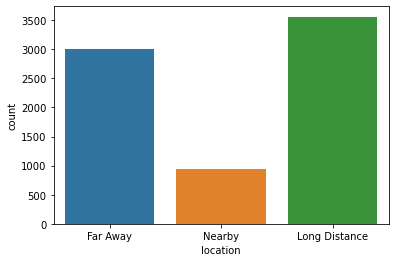

In [94]:
# let's check how far frauds happens from customer's residence
sns.countplot(data_fraud.location)
plt.show()

It can be seen that if the merchant's location is far away from customer's location, then the probability of transaction being a fraud increases

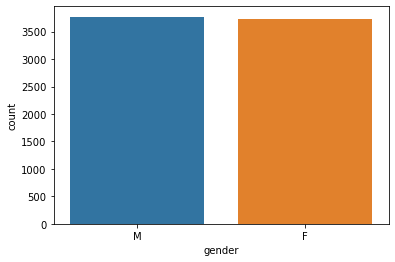

In [95]:
# let's have a look on fraud transactions based on Gender
sns.countplot(data_fraud.gender)
plt.show()

We can see that both are equally vulnerable to fraud transactions

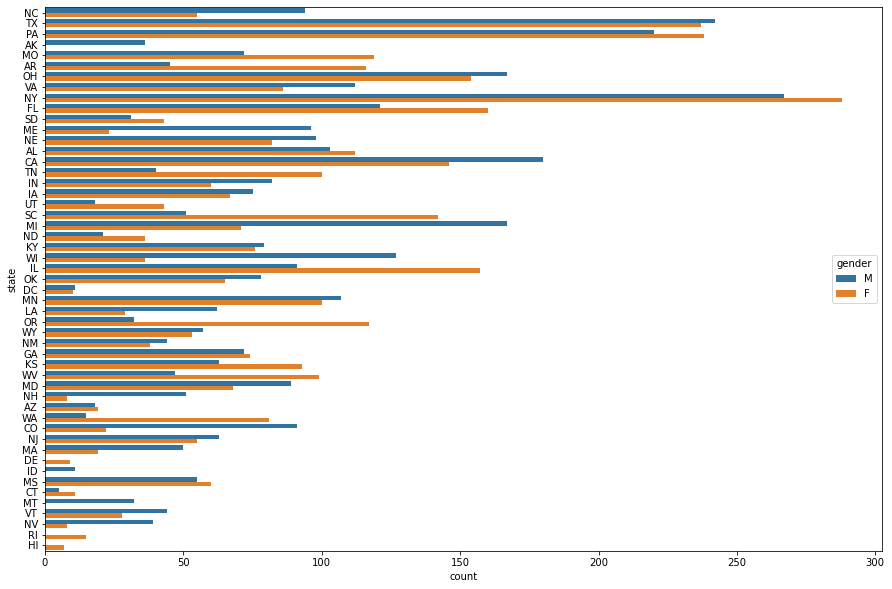

In [96]:
# Let's see the above graph through states
plt.figure(figsize = [15,10])
sns.countplot(y=data_fraud.state, hue=data_fraud.gender)
plt.show()

We can see that New York which have highest number of frauds happenning in the state, females are more vulnerable from fraud_attacks

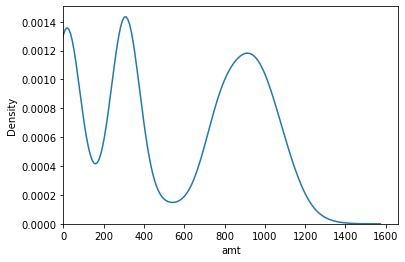

In [97]:
# Let's checkwhat is the fraud intensity respective to amount
sns.kdeplot(data_fraud.amt)
plt.xlim(left=0)
plt.show()

Its forming a cycle, no insights can be formed, just to be clear more frauds are happening from the amount range of $200-$400

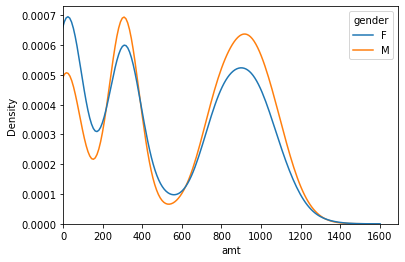

In [98]:
# let's visualize this cycle with respect to gender
sns.kdeplot(data_fraud.amt,hue=data.gender)
plt.xlim(left=0)
plt.show()

From here we can visualize that Male faces more losses than females


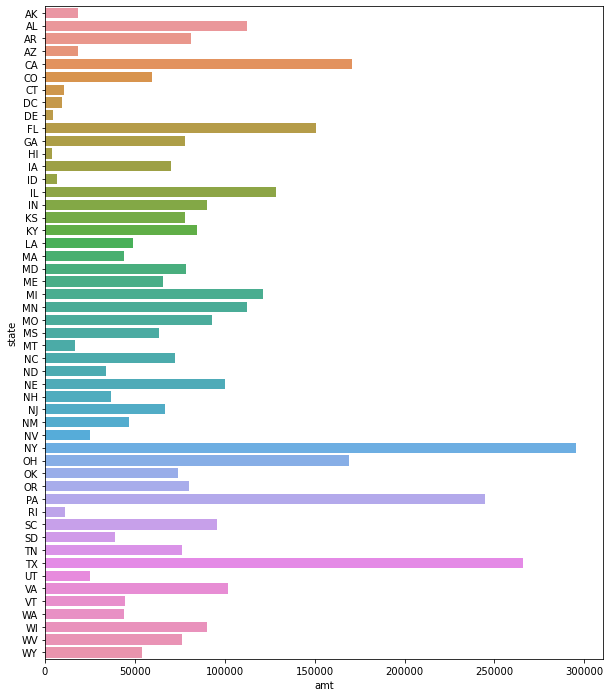

In [99]:
# Let's see statewise losses
# initializing data
data_state = data_fraud.groupby(by = "state").sum()
plt.figure(figsize=[10,12]),
sns.barplot(y = data_state.index,x=data_state.amt)
plt.show()

Highest losses are from New York

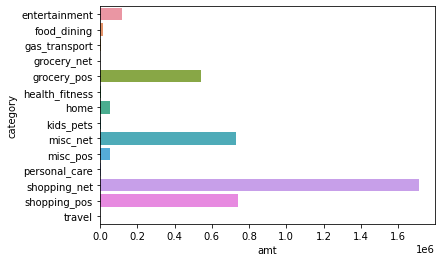

In [100]:
# Let's see in which category the losses are huge
data_cat = data_fraud.groupby(by = "category").sum()
sns.barplot(y = data_cat.index,x=data_cat.amt)
plt.show()

From above we can come to a conclusion that internet shopping amounts to huge losses to the company which are more than $1.6 million

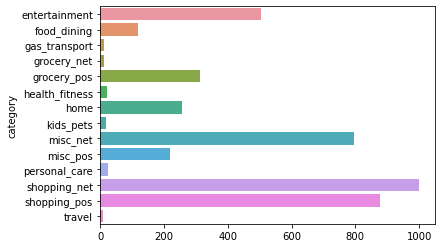

,Category,Ticket Size
11,shopping_net,999.254939
12,shopping_pos,876.921815
8,misc_net,797.012852
0,entertainment,503.535579
4,grocery_pos,311.989616
6,home,257.432626
9,misc_pos,218.284080
1,food_dining,120.076954
10,personal_care,26.170545
5,health_fitness,20.248421


In [101]:
# Let's have a look on average ticket_size of frauds in each category
sns.barplot(y=data_cat.index,x= (data_cat.amt/data_cat.is_fraud))
plt.show()
data_ticket = pd.DataFrame({"Category" : data_cat.index,"Ticket Size": data_cat.amt/data_cat.is_fraud})
data_ticket.reset_index(inplace=True)
data_ticket.drop("category",1,inplace=True)
data_ticket.sort_values(by="Ticket Size",ascending=False)

We can see the hishest ticket size is in shopping_net, which means high amount is withdrawn with every fraud transaction of category shopping_net or **Internet Shopping**

## Model Building

### Logistic Regression

#### Creating Dummy Variables

In [102]:
# we need to drop "merchant","job","trans_date_trans_time" columns because we have binned them, and also to avoid model complexity and multicollinearity,
# also we need to drop unique identifiers columns because those are for company's reference only and does not contribute in fraud prediction

# we are also removing state columnn, because it will create 49 extra dummy variables which will make our model computationally cost intensive model
# also in state column there are many states which have very less number of fraud transactions, so because of class imbalance those dummy variables can raise some unwanted cases

data4 = data.drop(columns=["trans_date_trans_time","cc_num","merchant","job","state"])
data5 = pd.get_dummies(data=data4,columns=["category","gender","recency_segment","city_pop_segment","location"], drop_first=True)

# assigning them to test dataset

data6 = data_t.drop(columns=["trans_date_trans_time","cc_num","merchant","job","state"])
data_test = pd.get_dummies(data=data6,columns=["category","gender","recency_segment","city_pop_segment","location"], drop_first=True)

In [103]:
# checking columns
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   amt                                 1296675 non-null  float64
 1   is_fraud                            1296675 non-null  int64  
 2   recency                             1296675 non-null  float64
 3   displacement                        1296675 non-null  float64
 4   Time                                1296675 non-null  int64  
 5   category_food_dining                1296675 non-null  uint8  
 6   category_gas_transport              1296675 non-null  uint8  
 7   category_grocery_net                1296675 non-null  uint8  
 8   category_grocery_pos                1296675 non-null  uint8  
 9   category_health_fitness             1296675 non-null  uint8  
 10  category_home                       1296675 non-null  uint8  
 11  category_ki

#### Normalizing the data

In [104]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [105]:
data5[["amt","Time","displacement","recency"]] = sc.fit_transform(data5[["amt","Time","displacement","recency"]])

In [106]:
data5.head()

,amt,is_fraud,recency,displacement,Time,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,gender_M,recency_segment_After 6 hours,recency_segment_After Half-Day,recency_segment_First Transaction,recency_segment_Recent_Transaction,recency_segment_Within 6 hours,city_pop_segment_Densely populated,city_pop_segment_Less Dense,location_Long Distance,location_Nearby
0,-0.407826,0,-0.685836,0.376362,-1.878145,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,0.230039,0,-0.685836,-1.732586,-1.878145,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,0.934149,0,-0.685836,0.738140,-1.878145,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
3,-0.158132,0,-0.685836,0.541322,-1.878145,0,1,0,0,0,...,1,0,0,1,0,0,0,1,1,0
4,-0.177094,0,-0.685836,0.361173,-1.878145,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0


#### Separating the target variable

In [107]:
y= data5.is_fraud[:]
x=data5.drop("is_fraud",1)

In [108]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   amt                                 1296675 non-null  float64
 1   is_fraud                            1296675 non-null  int64  
 2   recency                             1296675 non-null  float64
 3   displacement                        1296675 non-null  float64
 4   Time                                1296675 non-null  float64
 5   category_food_dining                1296675 non-null  uint8  
 6   category_gas_transport              1296675 non-null  uint8  
 7   category_grocery_net                1296675 non-null  uint8  
 8   category_grocery_pos                1296675 non-null  uint8  
 9   category_health_fitness             1296675 non-null  uint8  
 10  category_home                       1296675 non-null  uint8  
 11  category_ki

#### Building Model

In [109]:
# importing libraries
import statsmodels.api as sm

model1 = sm.GLM(y,sm.add_constant(x),family = sm.families.Binomial())

In [110]:
# fitting model and checking results
res = model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              1296675
Model:                            GLM   Df Residuals:                  1296647
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35796.
Date:                Tue, 12 Jul 2022   Deviance:                       71592.
Time:                        17:42:59   Pearson chi2:                 2.32e+16
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -7.7486      0.141    -54.827      0.000      -8.026      -7.472
amt                                    0.4236      0.005     77.804      0.000       0.413       0.434
recency                                0.0387      0.036      1.086      0.277      -0.031       0.109
displacement                          -0.0250      0.029     -0.862      0.389      -0.082       0.032
Time                                   0.7163      0.016     43.508      0.000       0.684       0.749
category_food_dining                  -0.3879      0.105     -3.706      0.000      -0.593      -0.183
category_gas_transport                 1.9510      0.082     23.846      0.000       1.791       2.111
category_grocery_net                   1.5267      0.112     13.613      0.000       1.307       1.746
category_grocery_pos                   2.8371      0.074     38.111      0.000       2.691       2.983
category_health_fitness               -0.5328      0.109     -4.893      0.000      -0.746      -0.319
category_home                         -0.4951      0.097     -5.110      0.000      -0.685      -0.305
category_kids_pets                    -0.2073      0.092     -2.245      0.025      -0.388      -0.026
category_misc_net                      2.2242      0.076     29.337      0.000       2.076       2.373
category_misc_pos                      0.4956      0.092      5.367      0.000       0.315       0.677
category_personal_care                -0.0344      0.094     -0.365      0.715      -0.219       0.150
category_shopping_net                  1.6448      0.072     22.735      0.000       1.503       1.787
category_shopping_pos                  0.6863      0.078      8.803      0.000       0.533       0.839
category_travel                       -6.2249      0.327    -19.064      0.000      -6.865      -5.585
gender_M                               0.3241      0.025     13.112      0.000       0.276       0.373
recency_segment_After 6 hours          0.3901      0.125      3.120      0.002       0.145       0.635
recency_segment_After Half-Day         1.1960      0.106     11.292      0.000       0.988       1.404
recency_segment_First Transaction      3.7935      0.189     20.025      0.000       3.422       4.165
recency_segment_Recent_Transaction     2.0405      0.138     14.738      0.000       1.769       2.312
recency_segment_Within 6 hours         0.6942      0.133      5.214      0.000       0.433       0.955
city_pop_segment_Densely populated    -0.0570      0.045     -1.260      0.208      -0.146       0.032
city_pop_segment_Less Dense            0.0464      0.038      1.208      0.227      -0.029       0.122
location_Long Distance                 0.0226      0.046      0.490      0.624      -0.068      

We can see that there are many columns which are insignificant to work upon as they have p value greater than 0.05 so, let's remove them and and find best variables through recursive function elimination, i.e. RFE

#### RFE

In [111]:
# importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [112]:
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select= 22)
rfe_res = rfe.fit(x,y)

In [113]:
# columns which were selected by RFE
x.columns[rfe_res.support_]

Index(['amt', 'Time', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M',
       'recency_segment_After 6 hours', 'recency_segment_After Half-Day',
       'recency_segment_First Transaction',
       'recency_segment_Recent_Transaction', 'recency_segment_Within 6 hours',
       'city_pop_segment_Densely populated', 'location_Nearby'],
      dtype='object')

In [114]:
# let's check the support columns rankings
list(zip(x.columns,rfe.support_,rfe.ranking_))

[('amt', True, 1),
 ('recency', False, 6),
 ('displacement', False, 4),
 ('Time', True, 1),
 ('category_food_dining', True, 1),
 ('category_gas_transport', True, 1),
 ('category_grocery_net', True, 1),
 ('category_grocery_pos', True, 1),
 ('category_health_fitness', True, 1),
 ('category_home', True, 1),
 ('category_kids_pets', True, 1),
 ('category_misc_net', True, 1),
 ('category_misc_pos', True, 1),
 ('category_personal_care', False, 2),
 ('category_shopping_net', True, 1),
 ('category_shopping_pos', True, 1),
 ('category_travel', True, 1),
 ('gender_M', True, 1),
 ('recency_segment_After 6 hours', True, 1),
 ('recency_segment_After Half-Day', True, 1),
 ('recency_segment_First Transaction', True, 1),
 ('recency_segment_Recent_Transaction', True, 1),
 ('recency_segment_Within 6 hours', True, 1),
 ('city_pop_segment_Densely populated', True, 1),
 ('city_pop_segment_Less Dense', False, 3),
 ('location_Long Distance', False, 5),
 ('location_Nearby', True, 1)]

In [115]:
# initializing rfe columns to cols for further operations
cols = x.columns[rfe_res.support_]

#### Building Model Again after running RFE

In [116]:
# making model with rfe selected columns
model2 = sm.GLM(y,sm.add_constant(x[cols]),family = sm.families.Binomial())
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              1296675
Model:                            GLM   Df Residuals:                  1296652
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35798.
Date:                Tue, 12 Jul 2022   Deviance:                       71596.
Time:                        17:45:10   Pearson chi2:                 2.32e+16
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -7.6190      0.087    -87.823      0.000      -7.789      -7.449
amt                                    0.4236      0.005     77.828      0.000       0.413       0.434
Time                                   0.7157      0.016     43.481      0.000       0.683       0.748
category_food_dining                  -0.3713      0.094     -3.944      0.000      -0.556      -0.187
category_gas_transport                 1.9677      0.068     28.907      0.000       1.834       2.101
category_grocery_net                   1.5397      0.103     15.022      0.000       1.339       1.741
category_grocery_pos                   2.8527      0.059     48.363      0.000       2.737       2.968
category_health_fitness               -0.5157      0.099     -5.220      0.000      -0.709      -0.322
category_home                         -0.4782      0.085     -5.602      0.000      -0.646      -0.311
category_kids_pets                    -0.1906      0.080     -2.378      0.017      -0.348      -0.034
category_misc_net                      2.2407      0.061     36.968      0.000       2.122       2.360
category_misc_pos                      0.5114      0.080      6.371      0.000       0.354       0.669
category_shopping_net                  1.6594      0.056     29.586      0.000       1.549       1.769
category_shopping_pos                  0.7005      0.063     11.088      0.000       0.577       0.824
category_travel                       -6.2082      0.323    -19.192      0.000      -6.842      -5.574
gender_M                               0.3235      0.025     13.099      0.000       0.275       0.372
recency_segment_After 6 hours          0.2891      0.081      3.550      0.000       0.129       0.449
recency_segment_After Half-Day         1.1196      0.077     14.450      0.000       0.968       1.271
recency_segment_First Transaction      3.6655      0.148     24.753      0.000       3.375       3.956
recency_segment_Recent_Transaction     1.9156      0.074     25.838      0.000       1.770       2.061
recency_segment_Within 6 hours         0.5769      0.075      7.672      0.000       0.429       0.724
city_pop_segment_Densely populated    -0.0959      0.032     -3.041      0.002      -0.158      -0.034
location_Nearby                       -0.0616      0.037     -1.659      0.097      -0.134       0.011
======================================================================================================
"""

We can see that still there are many columns which have p value greater than 0.05 which makes these columns insignificant, since after doing RFE we are getting adequate amount of insignificant columns, so let's do the RFE again, this time will select less number of best features

In [117]:
# dropping columns which have p value greater than 0.05
cols = cols.drop(["recency_segment_After 6 hours","location_Nearby"],1)

Building model again and checking for insignificant variables

In [118]:
# building model
model3 = sm.GLM(y,sm.add_constant(x[cols]),family = sm.families.Binomial())
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              1296675
Model:                            GLM   Df Residuals:                  1296654
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35806.
Date:                Tue, 12 Jul 2022   Deviance:                       71611.
Time:                        17:45:36   Pearson chi2:                 2.32e+16
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -7.4127      0.060   -123.399      0.000      -7.530      -7.295
amt                                    0.4235      0.005     77.830      0.000       0.413       0.434
Time                                   0.7160      0.016     43.516      0.000       0.684       0.748
category_food_dining                  -0.3716      0.094     -3.947      0.000      -0.556      -0.187
category_gas_transport                 1.9706      0.068     28.953      0.000       1.837       2.104
category_grocery_net                   1.5447      0.102     15.072      0.000       1.344       1.746
category_grocery_pos                   2.8551      0.059     48.414      0.000       2.739       2.971
category_health_fitness               -0.5158      0.099     -5.221      0.000      -0.709      -0.322
category_home                         -0.4781      0.085     -5.602      0.000      -0.645      -0.311
category_kids_pets                    -0.1906      0.080     -2.378      0.017      -0.348      -0.034
category_misc_net                      2.2421      0.061     36.994      0.000       2.123       2.361
category_misc_pos                      0.5121      0.080      6.380      0.000       0.355       0.669
category_shopping_net                  1.6605      0.056     29.607      0.000       1.551       1.770
category_shopping_pos                  0.7006      0.063     11.090      0.000       0.577       0.824
category_travel                       -6.2040      0.323    -19.186      0.000      -6.838      -5.570
gender_M                               0.3220      0.025     13.043      0.000       0.274       0.370
recency_segment_After Half-Day         0.9048      0.046     19.799      0.000       0.815       0.994
recency_segment_First Transaction      3.4496      0.134     25.708      0.000       3.187       3.713
recency_segment_Recent_Transaction     1.7009      0.040     42.723      0.000       1.623       1.779
recency_segment_Within 6 hours         0.3620      0.042      8.683      0.000       0.280       0.444
city_pop_segment_Densely populated    -0.0959      0.032     -3.041      0.002      -0.158      -0.034
======================================================================================================
"""

Now since model is made, let's check the Variance Inflation factors

#### VIF

In [119]:
# importing libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
vif = pd.DataFrame({"Features":cols})
vif["VIF"] = [variance_inflation_factor(x[cols].values,i) for i in range(x[cols].shape[1])]
vif = vif.sort_values(by="VIF",ascending = False)

In [121]:
vif

,Features,VIF
18,recency_segment_Within 6 hours,2.016160
1,Time,1.886867
14,gender_M,1.686097
3,category_gas_transport,1.523325
5,category_grocery_pos,1.503281
17,recency_segment_Recent_Transaction,1.412568
15,recency_segment_After Half-Day,1.360641
7,category_home,1.283113
8,category_kids_pets,1.253831
12,category_shopping_pos,1.237905


Since all of the above VIF values are below 3, we can proceed with the existing set of variables

#### Predictions

In [122]:
# predicting values
pred = res3.predict(sm.add_constant(x[cols]))

In [123]:
# making a dataframe
predictions = pd.DataFrame({"Actual": y,"Pred_Prob" : pred})

In [124]:
predictions.head()

,Actual,Pred_Prob
0,0,0.037746
1,0,0.086650
2,0,0.010050
3,0,0.043852
4,0,0.010471


In [125]:
# Now let's get the final predictions

threshold = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for z in threshold:
  predictions[z] = predictions["Pred_Prob"].map(lambda x: 0 if x<z else 1)

In [126]:
predictions.head()

,Actual,Pred_Prob,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.037746,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.086650,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.010050,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.043852,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.010471,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now since we have received the predictions for every threshold, let's have a look on which is the most optimal columns to rely on

#### Optimal Value

In [127]:
# importing liraries for metrics
import sklearn.metrics as metrics

In [128]:
# Since we need parameters like precision, recall, sensitivity,etc. we must need to consider confusion matrics
#
#   Confusion Matrix is 
#    Predicted/         0                1
#    Actual
#      0          True Negative     False Positive
#      1          False Negative    True Positive
# True Positive (TN) = [1,1]
# True Negative (TN) = [0,0]
# False Negative (FN) = [1,0]
# False Positive (FP) = [0,1]

In [129]:
# initialising a dataframe for graph
curve = pd.DataFrame(index = threshold, columns = ["accuracy","sensitivity","specificity"])

In [130]:
# assigning values for every threshold
for y in threshold:  
  matrix = metrics.confusion_matrix(predictions.Actual,predictions[y])
  accuracy = (matrix[1,1] + matrix[0,0])/ (matrix.sum())
  sensitivity = (matrix[1,1])/(matrix[1,1] + matrix[1,0])
  specificity = (matrix[0,0])/(matrix[0,0] + matrix[0,1])

  curve.loc[y] = [accuracy,sensitivity,specificity]

In [131]:
curve

,accuracy,sensitivity,specificity
0.01,0.89432,0.669864,0.895627
0.02,0.961172,0.549427,0.96357
0.03,0.978435,0.511058,0.981156
0.04,0.985558,0.463363,0.988598
0.05,0.989496,0.427391,0.992769
0.06,0.991814,0.404077,0.995236
0.07,0.992953,0.388223,0.996474
0.08,0.993528,0.373435,0.997138
0.09,0.993869,0.361844,0.997549
0.10,0.994107,0.347056,0.997875


<AxesSubplot:>

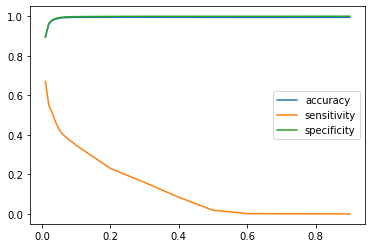

In [132]:
# plotting graph
curve.plot()

we cannot derive anything from the following graph

we cannot receive a clear insight from the graph because of class imbalance, so let's try precision recall graph

In [133]:
for y in threshold:
  curve.loc[y,"Precision"] = metrics.precision_score(predictions.Actual,predictions[y])
  curve.loc[y,"Recall"] = metrics.recall_score(predictions.Actual,predictions[y])

<AxesSubplot:>

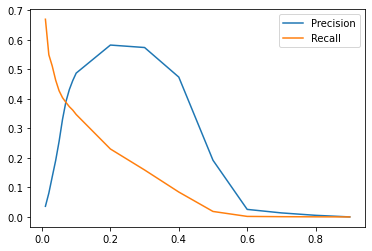

In [134]:
curve[["Precision","Recall"]].plot()

Optimal point is 0.1, but the resultant precision and recall are very low, let's have a look forward and analyze optimum point

In [135]:
curve

,accuracy,sensitivity,specificity,Precision,Recall
0.01,0.89432,0.669864,0.895627,0.036022,0.669864
0.02,0.961172,0.549427,0.96357,0.080722,0.549427
0.03,0.978435,0.511058,0.981156,0.136372,0.511058
0.04,0.985558,0.463363,0.988598,0.191341,0.463363
0.05,0.989496,0.427391,0.992769,0.256026,0.427391
0.06,0.991814,0.404077,0.995236,0.330608,0.404077
0.07,0.992953,0.388223,0.996474,0.390617,0.388223
0.08,0.993528,0.373435,0.997138,0.431762,0.373435
0.09,0.993869,0.361844,0.997549,0.462219,0.361844
0.10,0.994107,0.347056,0.997875,0.487371,0.347056


Since there is a huge class imbalance, we are encountering a huge fluctuation in precision and recall values.

Our main motive is to identify fraud transactions and build a model with high specificity (i.e. Total negatives predicted out of all the actual negatives), precision (i.e. Out of all the predicted positives, how much are actually positives) and recall (i.e. Out of all the real fraud transactions, how much are predicted as fraud transactions). So, we need to take a right blend of values of all these variables.

Since, high recall model is very important as we need to predict as much as fraud transactions because company have to refund a full amount of fraud to the customer.

Let's test at which multiple there will be highest cost saving, so we can prefer that

In [136]:
predictions.head()

,Actual,Pred_Prob,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.037746,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.086650,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.010050,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.043852,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.010471,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
# merging the databases
profit = pd.merge(data["amt"],predictions,left_index = True,right_index=True)

In [138]:
profit.head()

,amt,Actual,Pred_Prob,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,4.97,0,0.037746,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,0,0.086650,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,220.11,0,0.010050,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,0,0.043852,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,0,0.010471,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
profit_table = pd.DataFrame(index=threshold,columns = ["Fraud_Loss","Predicted_Loss","Cost","Profit_Of_Company"])

In [140]:
for z in threshold:
  loss = data[data["is_fraud"]==1]["amt"].sum()
  Predicted_Loss1 = profit[(profit[z]==1) & (profit["Actual"]==1)]["amt"].sum()
  cost = profit[z].sum()*1.5
  Profit = Predicted_Loss1 - cost

  profit_table.loc[z] = [loss,Predicted_Loss1,cost,Profit]

In [141]:
profit_table

,Fraud_Loss,Predicted_Loss,Cost,Profit_Of_Company
0.01,3988088.61,3615402.66,209374.5,3406028.16
0.02,3988088.61,3228350.09,76633.5,3151716.59
0.03,3988088.61,3069474.47,42193.5,3027280.97
0.04,3988088.61,2889810.11,27265.5,2862544.61
0.05,3988088.61,2741228.19,18795.0,2722433.19
0.06,3988088.61,2613663.13,13761.0,2599902.13
0.07,3988088.61,2517836.13,11190.0,2506646.13
0.08,3988088.61,2428671.55,9738.0,2418933.55
0.09,3988088.61,2354888.32,8814.0,2346074.32
0.10,3988088.61,2265519.67,8017.5,2257502.17


It can be clearly seen that multiple 0.01 has the highest cost saving which will be done by the company. So we will go with **0.01** multiple having 79% reall and 2% precision

#### ROC Curve

In [142]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def edu_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate')
    
    plt.ylabel('True Positive Rate')
    
    plt.title('ROC Curve')
    
    plt.legend(loc="best")

    plt.show()

    return None   # no return

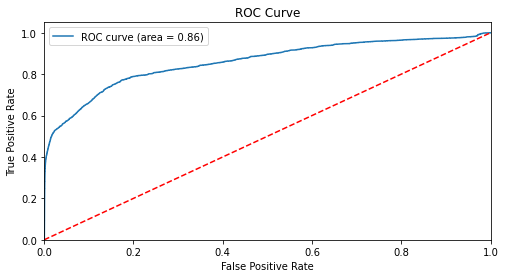

In [143]:
edu_roc(predictions["Actual"],predictions["Pred_Prob"])

The area under the curve is 86% which is really a good curve, and we can think of moving forward with this model

#### Test Data-Set

In [144]:
# initializing test data set to x and target variables
target_test = data_test["is_fraud"]
x_test = data_test.drop("is_fraud",1)

In [145]:
# Normalising the data
x_test[["amt","Time","displacement","recency"]] = sc.fit_transform(x_test[["amt","Time","displacement","recency"]])

In [146]:
# predicting values of test dataset
result = res3.predict(sm.add_constant(x_test[cols]))

In [147]:
# assigning of values
predictions_test = pd.DataFrame({"Actual": target_test,"Pred_Prob" : result})

In [148]:
predictions_test["Final"] = predictions_test["Pred_Prob"].map(lambda x: 0 if x<0.01 else 1)

In [149]:
metrics.precision_score(predictions_test["Actual"],predictions_test["Final"])

0.02260855884203902

In [150]:
metrics.recall_score(predictions_test["Actual"],predictions_test["Final"])

0.66993006993007

In [151]:
print(metrics.classification_report(predictions_test["Actual"],predictions_test["Final"]))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.02      0.67      0.04      2145

    accuracy                           0.89    555719
   macro avg       0.51      0.78      0.49    555719
weighted avg       0.99      0.89      0.94    555719



Now, since we got high recall score, let's check the profits made by company

#### Profit Of Company

In [152]:
profit = pd.merge(data_t["amt"],predictions_test,left_index = True,right_index = True)

In [153]:
loss = data_t[data_t["is_fraud"]==1]["amt"].sum()
Predicted_Loss = profit[(profit["Final"]==1) & (profit["Actual"]==1)]["amt"].sum()
cost = profit["Final"].sum()*1.5
Profit = Predicted_Loss - cost

profit_table = pd.DataFrame({"Fraud_Loss" : [loss],"Predicted_Loss" : [Predicted_Loss],"Cost" : [cost],"Profit_Of_Company" : [Profit]})

In [154]:
profit_table

,Fraud_Loss,Predicted_Loss,Cost,Profit_Of_Company
0,1133324.68,1033660.98,95340.0,938320.98


We have saved 909k dollars of the company including costs, out of the actual loss of $1.13 million if the model wasn't implemented

## Final Results

Since we went through all the models which can be found, we like to proceed with logistic regression, so let's move and present final insights on Test Data

In [155]:
data_t.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'job', 'is_fraud', 'recency', 'displacement',
       'location', 'Time', 'city_pop_segment', 'recency_segment'],
      dtype='object')

### Average Number of transactions per month

In [156]:
data_t["month"] = data_t["trans_date_trans_time"].dt.month

In [157]:
data_t["year"] = data_t["trans_date_trans_time"].dt.year

In [158]:
result1 = (data_t.groupby(by = ["year","month"]).count()).mean()

In [159]:
result1[1]

79388.42857142857

Average Number of Fraudulent transactions per month

In [160]:
result2 = (data_t[data_t["is_fraud"]==1].groupby(by = ["year","month"]).count()).mean()

In [161]:
result2[1]

306.42857142857144

Average amount per fraud transaction

In [162]:
result3 = data_t[data_t["is_fraud"]==1]["amt"].sum()/data_t[data_t["is_fraud"]==1].count()

In [163]:
result3[1]

528.3564941724942

Cost incurred per month before the model was deployed (result2 * result3)

In [164]:
result2[1] * result3[1]

161903.52571428573

Average number of transactions per month detected as fraudulent by the model (TF)

In [165]:
predictions_test.head()

,Actual,Pred_Prob,Final
0,0,0.017955,1
1,0,0.015444,1
2,0,0.009566,0
3,0,0.034386,1
4,0,0.000041,0


In [166]:
# Combining date with predictions
predictions_test = pd.merge(data_t[["trans_date_trans_time","month","year"]],predictions_test,right_index=True,left_index= True)

In [167]:
predictions_test.head()

,trans_date_trans_time,month,year,Actual,Pred_Prob,Final
0,2020-06-21 12:14:25,6,2020,0,0.017955,1
1,2020-06-21 12:14:33,6,2020,0,0.015444,1
2,2020-06-21 12:14:53,6,2020,0,0.009566,0
3,2020-06-21 12:15:15,6,2020,0,0.034386,1
4,2020-06-21 12:15:17,6,2020,0,0.000041,0


Now since we were asked average number of transactions detected as fraud by the model, we will just include records whose Final predictions are 1. We are not checking Average number of true fraud transactions detected by model, so will just take Final column in consideration

In [168]:
TF = (predictions_test[(predictions_test["Final"]==1)].groupby(by=["year","month"]).count()).mean()[1]

In [169]:
TF

9080.0

Total cost of providing customer support per month for fraudulent transactions detected by the model (TF*$1.5)

In [170]:
TF*1.5

13620.0

Average number of transactions per month that are fraudulent but not detected by the model (FN)

In [171]:
FN = (predictions_test[(predictions_test["Final"]==0) & (predictions_test["Actual"] == 1)].groupby(by=["year","month"]).count()).mean()[1]

In [172]:
FN

101.14285714285714

Cost incurred due to fraudulent transactions left undetected by the model(FN*Amt)

We were not asked to present data per month, so we are showing overall

In [173]:
# merging amt column too 
predictions_test = pd.merge(data_t[["amt"]],predictions_test,right_index=True,left_index= True)

In [174]:
predictions_test.head()

,amt,trans_date_trans_time,month,year,Actual,Pred_Prob,Final
0,2.86,2020-06-21 12:14:25,6,2020,0,0.017955,1
1,29.84,2020-06-21 12:14:33,6,2020,0,0.015444,1
2,41.28,2020-06-21 12:14:53,6,2020,0,0.009566,0
3,60.05,2020-06-21 12:15:15,6,2020,0,0.034386,1
4,3.19,2020-06-21 12:15:17,6,2020,0,0.000041,0


In [175]:
result5 = predictions_test[(predictions_test["Final"]==0) & (predictions_test["Actual"] == 1)]["amt"].sum()

In [176]:
result5

99663.70000000001

Cost incurred per month after the model is built and deployed

In [177]:
# per month fraud transactions left undetected
per_month_fraud_amt = (predictions_test[(predictions_test["Final"]==0) & (predictions_test["Actual"] == 1)].groupby(by = ["year","month"]).sum()["amt"]).mean()

In [178]:
per_month_fraud_amt

14237.671428571426

In [183]:
# now TF*1.5

cost_per_month = TF*1.5
cost_per_month

13620.0

In [180]:
# cost per month + undetected fraud losses per month
total_cost_per_month = per_month_fraud_amt + cost_per_month

In [181]:
total_cost_per_month

27857.671428571426

Final Savings... Per Month

In [182]:
# it will be total cost incurred per month before the model was built - total cost incurred per month after the model was built
# i.e. (result2 * result3) - total_cost_per_month
(result2[1]*result3[1]) - total_cost_per_month

134045.8542857143